In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [100]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [101]:
X_train = train_df.drop(columns = ["label"]).values
y_train = train_df['label'].values
X_test = test_df.values

In [103]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [104]:
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

In [106]:
y_train = torch.tensor(y_train, dtype=torch.long)

In [107]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [108]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [111]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        return x
        
lenet5 = LeNet5()

In [112]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100
num_epochs = 10000

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_accuracy_history = []
test_loss_history = []

X_val = X_val.to(device)
y_val = y_val.to(device)

for epoch in range(num_epochs):
    lenet5.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        preds = lenet5(X_batch)
        loss_value = loss_fn(preds, y_batch)
        loss_value.backward()
        optimizer.step()

    lenet5.eval()
    with torch.no_grad():
        test_preds = lenet5(X_val)
        test_loss = loss_fn(test_preds, y_val).item()
        test_loss_history.append(test_loss)
        accuracy = (test_preds.argmax(dim=1) == y_val).float().mean().item()
        test_accuracy_history.append(accuracy)

    print(f'Epoch {epoch}, Test Accuracy: {accuracy}, Test Loss: {test_loss}')

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

In [28]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [29]:
y_train = train['label']
X_train = train.drop(labels = ['label'], axis = 1)
X_train = X_train/255.0
X_test = test/255.0

In [30]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes = 10)

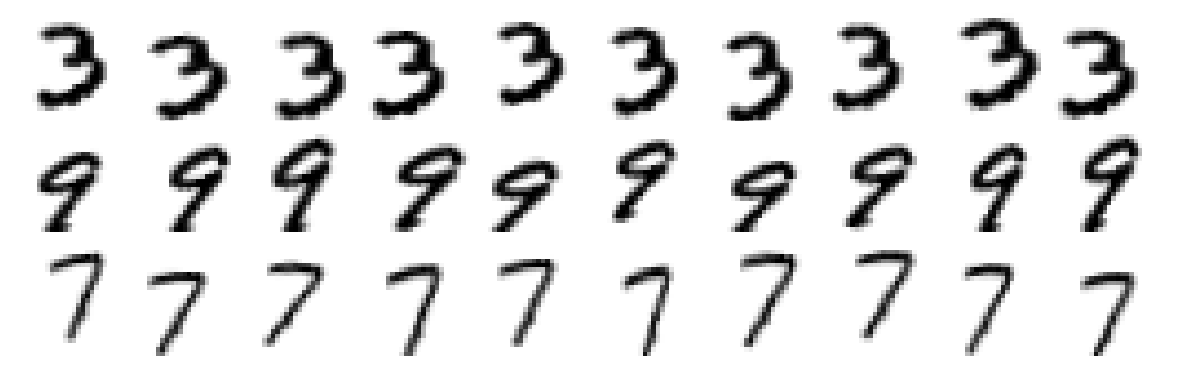

In [32]:
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).__next__()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

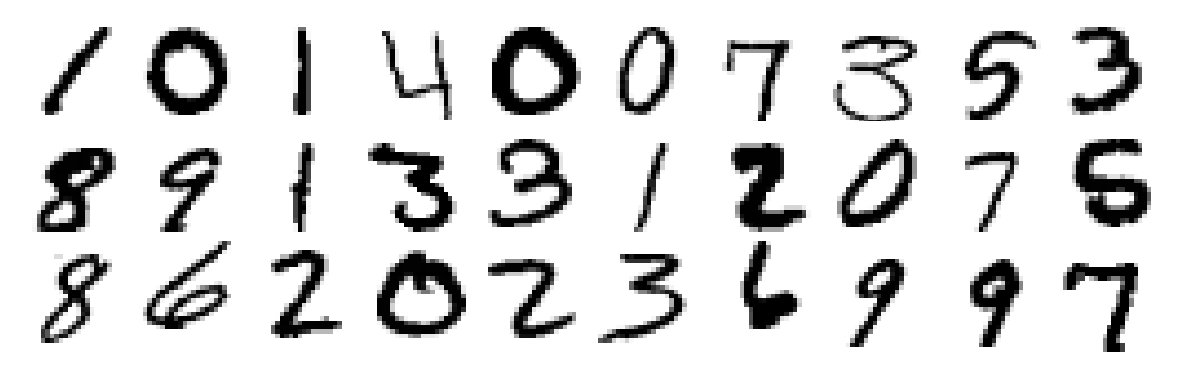

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [34]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [38]:
nets = 1
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history = [0] * nets
epochs = 3
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, y_train, test_size = 0.1)
    history[j] = model[j].fit(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 1: Epochs=3, Train accuracy=0.97538, Validation accuracy=0.98905


In [42]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")

In [81]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [144]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [145]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

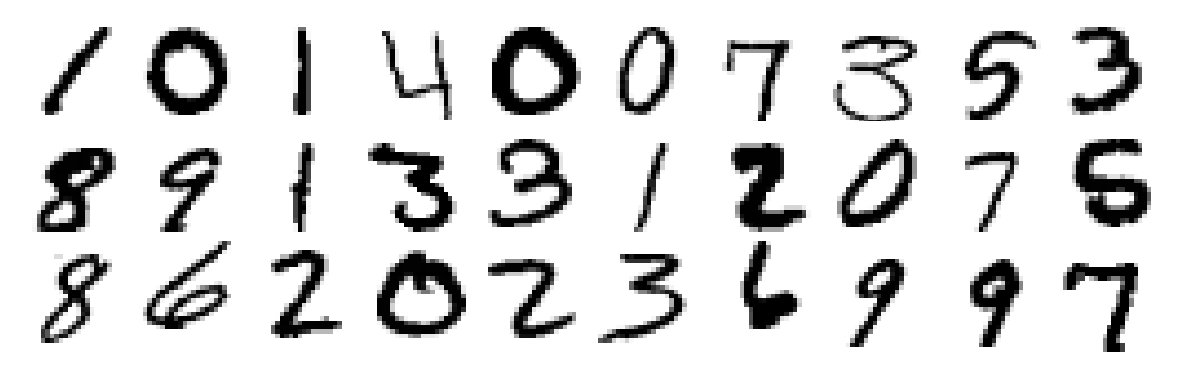

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [147]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

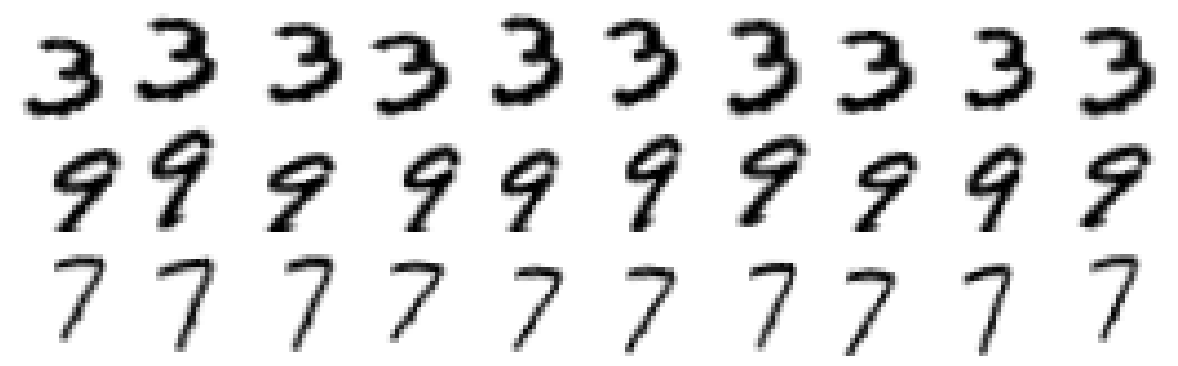

In [148]:
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).__next__()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

In [90]:
Y_train = to_categorical(y_train, num_classes = 10)


In [203]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [204]:
x_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test.csv")

In [205]:
y_train = x_train["label"]
x_train = x_train.drop(labels = ["label"],axis = 1)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
y_train = to_categorical(y_train, num_classes = 10)

In [206]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [207]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [197]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(128, kernel_size = 4, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(datagen.flow(X_train2, Y_train2, batch_size=32), 
                    epochs=5, 
                    validation_data=(X_val2, Y_val2))

In [199]:
val_loss, val_acc = model.evaluate(X_val2, Y_val2)
print(val_loss, val_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9887 - loss: 0.0382
0.036700423806905746 0.9895238280296326


In [200]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

In [210]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
x_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test.csv")

In [5]:
y_train = x_train["label"]
x_train = x_train.drop(labels = ["label"],axis = 1)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
y_train = to_categorical(y_train, num_classes = 10)

In [6]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [7]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(128, kernel_size = 4, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["TF_NUM_INTRAOP_THREADS"] = "2"
os.environ["TF_NUM_INTEROP_THREADS"] = "2"

tf.config.threading.set_inter_op_parallelism_threads(2)
tf.config.threading.set_intra_op_parallelism_threads(2)

In [10]:
history = model.fit(datagen.flow(X_train2, Y_train2, batch_size=32), 
                    epochs=15, 
                    validation_data=(X_val2, Y_val2))

Epoch 1/15
   1/1182 ━━━━━━━━━━━━━━━━━━━━ 2:17:28 7s/step - accuracy: 0.1250 - loss: 3.0297

D:\anaconda3_\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1182/1182 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - accuracy: 0.7450 - loss: 0.8274 - val_accuracy: 0.9850 - val_loss: 0.0459
Epoch 2/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.9553 - loss: 0.1468 - val_accuracy: 0.9881 - val_loss: 0.0384
Epoch 3/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.9642 - loss: 0.1206 - val_accuracy: 0.9876 - val_loss: 0.0371
Epoch 4/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.9729 - loss: 0.0926 - val_accuracy: 0.9905 - val_loss: 0.0255
Epoch 5/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.9752 - loss: 0.0852 - val_accuracy: 0.9857 - val_loss: 0.0416
Epoch 6/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.9794 - loss: 0.0707 - val_accuracy: 0.9910 - val_loss: 0.0264
Epoch 7/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 50s 42ms/step - accuracy: 0.9778 - loss: 0.0727 - val_accuracy: 0.9905 - val_loss: 0.0281
Epoch 8/15
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 47s 39ms/step - accuracy: 0.9786 - loss: 0.07

In [13]:
val_loss, val_acc = model.evaluate(X_val2, Y_val2)
print(val_loss, val_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9911 - loss: 0.0257
0.02599349431693554 0.9923809766769409


In [11]:
val_loss, val_acc = model.evaluate(X_val2, Y_val2)
print(val_loss, val_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9941 - loss: 0.0160
0.017100490629673004 0.9942857027053833


In [13]:
results = np.zeros((x_test.shape[0],10)) 
results = results + model.predict(x_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("RESULT.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


In [15]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
